In [56]:
import pandas as pd

# Get Data from Preprocessing
data = pd.read_pickle('../Data_Preprocessing/train.pkl')
test_data = pd.read_pickle('../Data_Preprocessing/test.pkl')

In [57]:
test_data.iloc[0]["News"]

['xico',
 'brink',
 'thousand',
 'expect',
 'mass',
 'protest',
 'study',
 'massacre',
 'corrupt',
 'violent',
 'threaten',
 'destabilise',
 'country',
 'mass',
 'murder',
 'study',
 'scandal',
 'preside',
 'group',
 'journalism',
 'launch',
 'law',
 'act',
 'scotland',
 'yard',
 'discover',
 'metropolis',
 'police',
 'record',
 'profess',
 'active',
 'secret',
 'database',
 'design',
 'monitor',
 'socalled',
 'home',
 'extremist',
 'meteorology',
 'world',
 'october',
 'continue',
 'het',
 'record',
 'despite',
 'bitter',
 'cold',
 'snap',
 'globe',
 'rush',
 'toward',
 'warm',
 'year',
 'record',
 'barrier',
 'reef',
 'slaughter',
 'science',
 'dismiss',
 'julie',
 'bishop',
 'claim',
 'reef',
 'govern',
 'unanimity',
 'approve',
 'slash',
 'plastic',
 'grocery',
 'bag',
 'friday',
 'hop',
 'curb',
 'litter',
 'land',
 'spread',
 'plastic',
 'soup',
 'world',
 'ocean',
 'thuanian',
 'preside',
 'call',
 'russia',
 'terror',
 'stat',
 'ssias',
 'igor',
 'strelkov',
 'responsible',
 'e

In [58]:
positive={}
negative={}
for index, row in data.iterrows():
    words = row["News"]
    if row["Label"] == 1:
        for word in words:
            if word in positive:
                positive[word]=positive[word]+1
            else:
                positive[word]=1
    else:
        for word in words:
            if word in negative:
                negative[word]=negative[word]+1
            else:
                negative[word]=1


In [59]:
print(len(negative))
print(len(positive))
# Mit Doppelungen
# 18691
# 19798
# Ohne Doppelungen
# 7751
# 8858

18691
19798


In [60]:

for word in list(positive.keys()):
    if word in negative:
        negative.pop(word)
        positive.pop(word)

for word in list(negative.keys()):
    if word in positive:
        negative.pop(word)
        positive.pop(word)


In [61]:
grouped_data= data.groupby('Label')
len_group_1 = sum(positive.values()) 
# len(grouped_data.get_group(1))
len_group_0 = sum(negative.values()) 
# len(grouped_data.get_group(-1))
# 1592
# 846
# 746
print(len_group_0) 


9340


In [65]:
import numpy as np
pp=len(grouped_data.get_group(1))/len(data)
pn=len(grouped_data.get_group(-1))/len(data)

x_values=[]
y_values=[]
for x in np.arange(0.0001,0.1,0.0001):
    fp=0
    tp=0
    fn=0
    tn=0
    x_values.append(x)
    for index, row in test_data.iterrows():
        words = row["News"]
        label = row["Label"]
        positive_weights=[]
        negative_weights=[]
        #test for positive
        for word in words:
            if word in positive:
                prop = positive[word]/len_group_1
#                 if prop > x: 
                positive_weights.append(prop)
            if word in negative:
                prop = negative[word]/len_group_0
#                 if prop > x:
                negative_weights.append(prop)
        positive_result=np.prod(positive_weights)
        negative_result=np.prod(negative_weights)
        results={"positive":positive_result*pp,"negative":negative_result*pn}
        prediction = max(results, key=results.get)
        if prediction == "positive":
            if label == 1:
                tp+=1
            elif label == -1:
                fp+=1
            else:
                print("Error")
        elif prediction == "negative":
            if label == 1:
                fn+=1
            elif label == -1:
                tn+=1
            else:
                print("Error2")
        else:
            print("Error3")
    y_values.append((tp+tn)/(fp+tp+fn+tn))

In [66]:
print(max(y_values))
#Ohne dup 0.5516372795969773 0.5516372795969773
#Mit dup 0.5566750629722922

# 1: 0.5516372795969773
# 2: 

0.5113350125944585


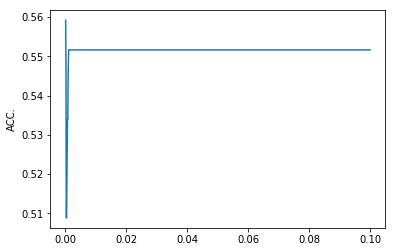

In [64]:
import matplotlib.pyplot as plt

plt.plot(x_values,y_values)
plt.ylabel('ACC.')
plt.show()